In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os, zipfile, qrcode, math, base64, IPython

In [ ]:
!rm -rf data/val2017 val2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip -d data > /dev/null

--2021-07-06 19:06:15--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.99.171
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.99.171|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  15.8MB/s    in 63s     

2021-07-06 19:07:18 (12.2 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [ ]:
!rm -rf raw
if not os.path.exists("data.zip"):
  raise Exception("Please upload a data.zip file containing your images")

with zipfile.ZipFile("data.zip", "r") as zip_obj:
  images = zip_obj.namelist()
  images = [x for x in images if x.endswith(".jpg") or x.endswith(".png") ]
  images = [ x for x in images if not "__MACOSX" in x ]
  if len(images) < 25:
    raise Exception("Please make sure data.zip contains at least 25 images (jpg or png)")
  for image in images:
    data = zip_obj.extract(image, f"raw")

Exception: ignored

In [ ]:
# TODO: Aug
!rm -rf data/output
import shutil
shutil.copytree("raw", "data/output")

In [ ]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_gen = data_gen.flow_from_directory(
    "data",
    target_size=(64, 64),
    batch_size=128,
    subset="training"
)

val_gen = data_gen.flow_from_directory(
    "data",
    target_size=(64, 64),
    batch_size=128,
    subset="validation"
)

Found 4500 images belonging to 1 classes.
Found 500 images belonging to 1 classes.


<Figure size 720x720 with 0 Axes>

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 0, '[1.]')

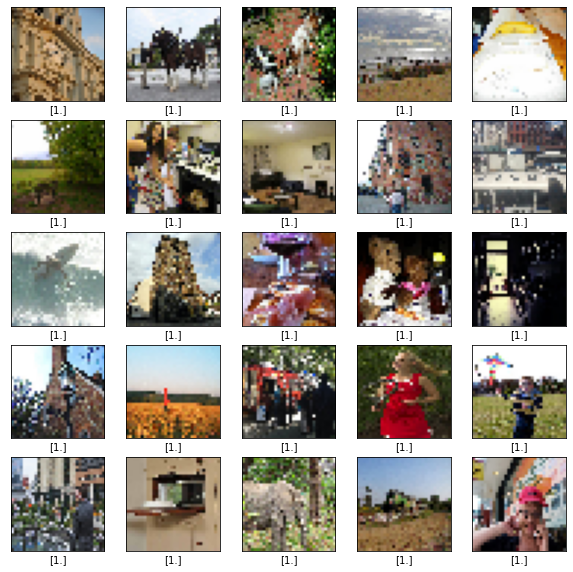

In [ ]:
plt.figure(figsize=(10,10))
batch = train_gen.next()
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(batch[0][i], cmap=plt.cm.binary)
  plt.xlabel(batch[1][i])
plt.show()

In [ ]:
# base = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), weights="imagenet", include_top=False)
# pool_layer = tf.keras.layers.GlobalAveragePooling2D()
# predict_layer = tf.keras.layers.Dense(train_gen.num_classes, activation="softmax")
# model = tf.keras.Sequential([base, pool_layer, predict_layer])
# model.summary()


model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu"))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(train_gen.num_classes, activation="softmax"))
model.summary()


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 60, 60, 16)        1216      
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 58, 58, 16)        2320      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 25, 25, 32)        12832     
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 23, 23, 32)        9248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 7, 7, 32)        

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.categorical_crossentropy
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# model.fit(
#     train_gen,
#     epochs=25,
#     steps_per_epoch=25,
#     validation_data=val_gen,
#     validation_steps=5
# )



In [93]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [ tf.lite.Optimize.OPTIMIZE_FOR_SIZE ]
model_data = converter.convert()

base64_bytes = base64.b64encode(model_data)
num_slides = math.ceil(len(base64_bytes) / 2300)

imgs = []
for n in range(num_slides):
  start = n*2300
  end = min(start + 2300, len(base64_bytes))
  qr = qrcode.QRCode(version=40)
  qr.add_data(f"{n},{num_slides},{base64_bytes[start:end]}")
  img = qr.make_image(fill="black", back_color="white")
  imgs += [ img.resize((1024, 1024)).convert("P") ]

imgs[0].save("qr.gif", format="GIF", append_images=imgs[1:], save_all=True, duration=100, loop=0)
print("Scan the folowing QR code with the MLClassifier app:")
IPython.display.Image(open("qr.gif","rb").read(), width=512, height=512)

INFO:tensorflow:Assets written to: /tmp/tmpa6ndveow/assets


INFO:tensorflow:Assets written to: /tmp/tmpa6ndveow/assets


DataOverflowError: ignored